## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
count = merged_data.index
number_of_rows = len(count)
print(number_of_rows)

1893


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
clean_data = merged_data[merged_data.duplicated(['Mouse ID'], keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_mouse = merged_data.drop_duplicates(subset=['Mouse ID'])
clean_data_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [15]:
# Checking the number of mice in the clean DataFrame.

count = clean_data.index
number_of_rows = len(count)
print(number_of_rows)

1881


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


regimen_group = clean_data.groupby("Drug Regimen")


average_tumor = regimen_group["Tumor Volume (mm3)"].mean()
median_tumor = regimen_group["Tumor Volume (mm3)"].median()
variance_tumor = regimen_group["Tumor Volume (mm3)"].var()
std_tumor = regimen_group["Tumor Volume (mm3)"].std()
sem_tumor = regimen_group["Tumor Volume (mm3)"].sem()

statistics_summary_df= pd.DataFrame({
    "Average Tumor":average_tumor,
    "Median Tumor":median_tumor,
    "Variance Tumor":variance_tumor,
    "STD of Tumor":std_tumor,
    "SEM Tumor":sem_tumor
    
})

statistics_summary_df






,Average Tumor,Median Tumor,Variance Tumor,STD of Tumor,SEM Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.765682,51.910178,38.835601,6.231822,0.472433
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.345698,53.739593,68.149888,8.255295,0.605308
Naftisol,54.432995,52.544915,65.934669,8.120017,0.598616
Placebo,54.083767,52.316010,61.051374,7.813538,0.582387
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.284444,52.488221,59.303779,7.700895,0.573991


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggregate_data = statistics_summary_df.agg({'Average Tumor': ['mean'], 'Median Tumor': ['median'], 'Variance Tumor': ['var'], 'STD of Tumor': ['std'],'SEM Tumor': ['sem']})
aggregate_data


,Average Tumor,Median Tumor,Variance Tumor,STD of Tumor,SEM Tumor
mean,51.03402,NaN,NaN,NaN,NaN
median,NaN,51.868408,NaN,NaN,NaN
sem,NaN,NaN,NaN,NaN,0.032586
std,NaN,NaN,NaN,1.214077,NaN
var,NaN,NaN,255.19319,NaN,NaN


## Bar and Pie Charts

In [49]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


#pandas_barchart


drug_counts =regimen_group["Tumor Volume (mm3)"] .count()
drug_counts


Drug Regimen
Capomulin    230
Ceftamin     174
Infubinol    178
Ketapril     186
Naftisol     184
Placebo      180
Propriva     160
Ramicane     228
Stelasyn     180
Zoniferol    181
Name: Tumor Volume (mm3), dtype: int64

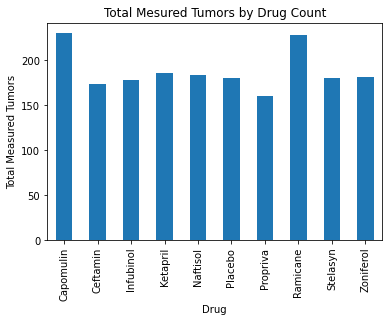

<Figure size 432x288 with 0 Axes>

In [50]:
drug_chart = drug_counts.plot(kind="bar", title="Total Mesured Tumors by Drug Count")
drug_chart.set_xlabel("Drug")
drug_chart.set_ylabel("Total Measured Tumors")
plt.show()
plt.tight_layout()

In [74]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#x_axis = np.arange(len(clean_data))
#tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(drug_counts, alpha=0.5, align="edge")

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1440x216 with 0 Axes>

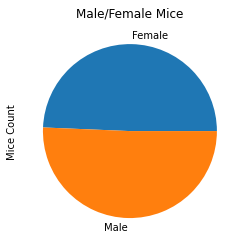

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

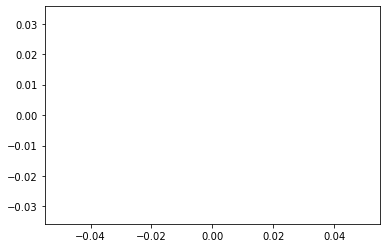

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = clean_data.groupby('Sex')
gender_count = gender_groups["Sex"] .count()

gender_chart = gender_count.plot(kind="pie", y =gender_count, title="Male/Female Mice")
gender_chart.set_ylabel("Mice Count")
plt.show()
plt.axis("equal")                                                                        

([<matplotlib.patches.Wedge at 0x17302378940>,
 [Text(0.02296322449328789, 1.0997602876631212, ''),
  Text(-0.022963327460277395, -1.099760285513144, '')])

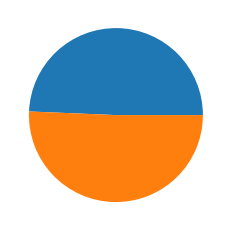

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count= gender_count

labels = "Sex"
plt.pie(gender_count)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_volume_data = []
for drug in treatments:
    values = clean_data["Tumor Volume (mm3)"]
    tumor_volume_data.appeand(values)
    print(tumore_volume_data)
    quartiles = tumor_volume_data.quantile([.25,.5,.75])
    lowerq = quartiles{.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of Capomulin Tumor Volume(mm3) is: {lowerq}")
    print(f"The lower quartile of Capomulin Tumor Volume(mm3) is: {upperq}")              
    print(f"The lower quartile of Capomulin Tumor Volume(mm3) is: {iqr}")    

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

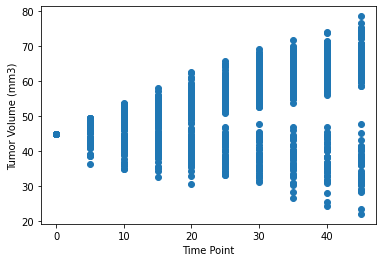

In [92]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.sca(clean_data["Timepoint"],clean_data["Tumor Volume (mm3)"])

plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [80]:
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


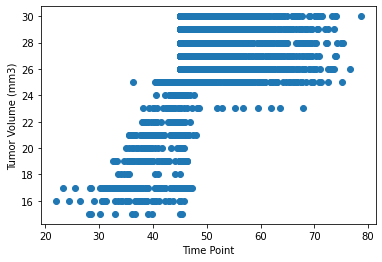

In [97]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(clean_data["Tumor Volume (mm3)"],clean_data["Weight (g)"])

plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [98]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(clean_data["Tumor Volume (mm3)"],clean_data["Weight (g)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.59
